In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json
from sklearn.model_selection import train_test_split
import torch
from torch import nn, optim
import time
from torch.utils.data import DataLoader, TensorDataset
import alpha_neuron as an

ModuleNotFoundError: No module named 'alpha_neuron'

In [ ]:
class SimpleNetwork(nn.Module):
    def __init__(self, V_len):
        super().__init__()

        self.G_leak = nn.Parameter(torch.ones(V_len) * 10)
        self.E_leak = nn.Parameter(torch.ones(V_len) * -35)
    
    def forward(self, x):

        I_leak = self.G_leak * (x - self.E_leak)
        dt = 0.001 * -(I_leak)
        
        return x + dt

net = SimpleNetwork(1)

for param in net.parameters():
    print(type(param.data), param.size())

In [ ]:
class AdvNetwork(nn.Module):
    def __init__(self, V_len):
        super().__init__()

        self.lin = nn.Linear(V_len, V_len)
    
    def forward(self, x):

        I_leak = self.lin(x)
        dt = 0.001 * -(I_leak)
        
        return x + dt

netAdv = AdvNetwork(400)

for param in netAdv.parameters():
    print(type(param.data), param.size())

In [ ]:
V = np.array([-60.0, -60.0])
G_syn = np.array([[0.0, 0.0], [0.0, 0.0]])
G_gap = np.array([[0.0, 0.0], [0.0,0.0]])

nnet = an.NeuronNetwork(V, G_syn, G_gap)

In [ ]:
V_m = torch.ones(1) * -60

for i in range(1000):
    V_m = netAdv(V_m)

In [ ]:
V_m = torch.ones(1000, 400) * -60

for i in range(1000):
    V_m = net(V_m)

In [ ]:
def train(model, criterion, optimizer, points, labels, epoches=5, batch=64, do_print=True):

    dataset = TensorDataset(points, labels)
    dataloader = DataLoader(dataset, batch_size=batch, shuffle=True)
    
    total_start_time = time.time()
    loss = -1
    for i in range(1,epoches+1):
        start_time = time.time()
        for points_batch, labels_batch in dataloader:
            optimizer.zero_grad()
            y = model(points_batch)
            loss = criterion(y, labels_batch)
            loss.backward()
            optimizer.step()
        end_time = time.time()

            
    total_end_time = time.time()
    total_time_taken = total_end_time - total_start_time
    if(do_print):
        print(f"Total Time {total_time_taken}")
        
    final_loss = loss.item()
    
    return (total_time_taken, final_loss)

In [ ]:
# Training Setup

torch.manual_seed(4687)
model = SimpleNetwork(50)

optimiser = optim.SGD(model.parameters(), lr=0.1)
crit = nn.MSELoss()

x_train = torch.ones(1000, 50) * -60
labels = torch.ones(1000, 50)


In [ ]:
train(model, crit, optimiser, x_train, labels, batch=10000, epoches=5000)

In [ ]:
for param in model.parameters():
    print(param[0])

In [ ]:
def calc(G_leak, E_leak):
    x = -60
    I_leak = G_leak * (x - E_leak)
    dt = 0.001 * -(I_leak)
    
    return x + dt

In [2]:
x_axis = np.linspace(-35, -30, 15)
y_axis = np.linspace(8, 20, 15)
data = np.zeros((len(x_axis), len(y_axis)))

for x, g in enumerate(y_axis):
    for y, e in enumerate(x_axis):
        value = (calc(g, e) - 1.0) ** 2
        data[x, y] = value

NameError: name 'calc' is not defined

In [3]:
import seaborn as sb

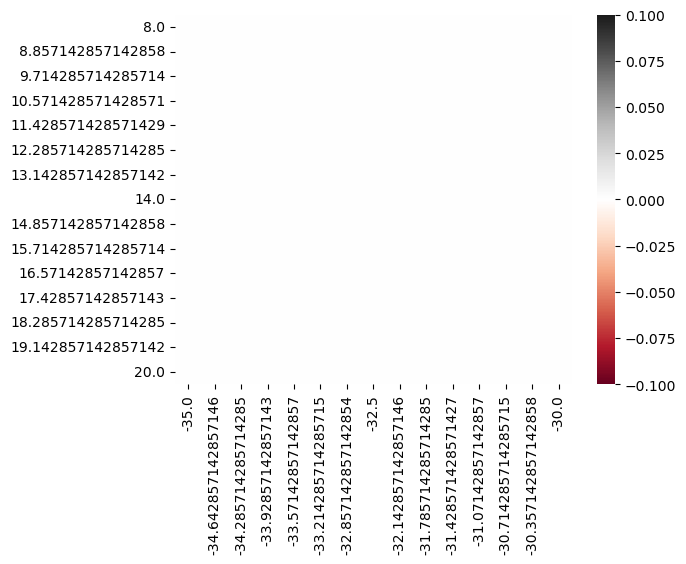

In [4]:
sb.heatmap(data, xticklabels=x_axis, yticklabels=y_axis, cmap="RdGy")
plt.show()

In [24]:
ten = torch.ones((50, 152), requires_grad=True)
ten = ten + ten[:, 50:].exp().pad()


AttributeError: 'Tensor' object has no attribute 'pad'

In [22]:
ten.shape

torch.Size([50, 102])